In [1]:
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [2]:
experiment_file_1 = OUTPUTS_DIR / "train_turboae_neural_encoder.json"

exp_files = [experiment_file_1]

In [5]:
training_runs = []
validation_runs = []
for exp_file in exp_files:
    with open(exp_file, "r") as e:
        results = json.load(e)
    for d in results["data"]:
        if "results" not in d:
            continue
            
        training_results = pd.DataFrame([res for res in d["results"] if res["type"] == "training"])
        validation_results = pd.DataFrame([{**res, "step": (d["results"][i-1]["step"] + 1 if i > 0 else 0)} for i, res in enumerate(d["results"]) if res["type"] == "validation"])
        preambles = pd.DataFrame([{**d["preamble"]["args"], **d["preamble"]}])
        training_results = training_results.merge(preambles, how="cross")
        validation_results = validation_results.merge(preambles, how="cross")
        
        
        training_runs.append(training_results)
        validation_runs.append(validation_results)

training = pd.concat(training_runs, axis=0)
validation = pd.concat(validation_runs, axis=0)

arg_select_cols = ["adam_lr", "block_len", "snr", "argument_hash"]
training_select_cols = ["xe", "ce", "ber", "bler", "step"] + (["true_ber"] if "true_ber" in training.columns else [])
val_select_cols = ["xe__mean", "ce__mean", "ber__mean", "bler__mean", "xe__err", "ce__err", "ber__err", "bler__err", "step", ] + (["true_ber__mean, true_ber__err"] if "true_ber" in validation.columns else [])

training = training[training_select_cols + arg_select_cols]
validation = validation[val_select_cols + arg_select_cols]

display(training.head())
display(validation.head())

,xe,ce,ber,bler,step,true_ber,adam_lr,block_len,snr,argument_hash
0,0.068078,0.107315,0.025879,0.320312,0,0.028714,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
1,0.544071,0.787021,0.279785,0.996094,1,0.283379,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
2,0.295920,0.424633,0.130859,0.867188,2,0.130993,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
3,0.146687,0.215994,0.059082,0.554688,3,0.062933,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
4,0.130238,0.164045,0.051514,0.484375,4,0.046974,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e


,xe__mean,ce__mean,ber__mean,bler__mean,xe__err,ce__err,ber__err,bler__err,step,adam_lr,block_len,snr,argument_hash
0,0.076293,0.109466,0.029126,0.331641,0.004241,0.003035,0.001927,0.018614,0,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
1,0.043323,0.066125,0.016260,0.200781,0.003021,0.002323,0.001418,0.015838,50,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
2,0.037626,0.057262,0.014429,0.180078,0.002882,0.002104,0.001370,0.015192,100,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
3,0.038449,0.053799,0.013940,0.176172,0.003101,0.002083,0.001332,0.015062,150,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e
4,0.036673,0.050967,0.013477,0.169141,0.003244,0.002039,0.001333,0.014821,200,0.01,16,2.0,3a473ba9807f369e7a93c2702325a4a0fe85f18e


/tmp/ipykernel_5634/37485341.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


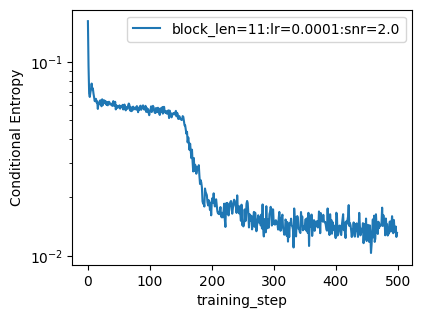

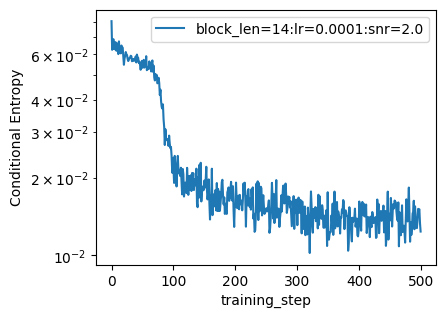

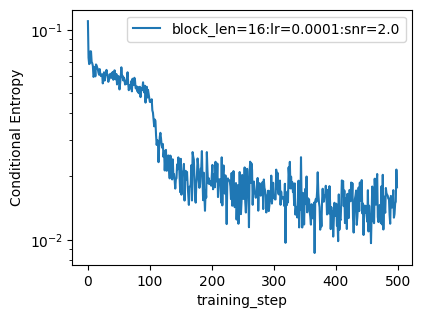

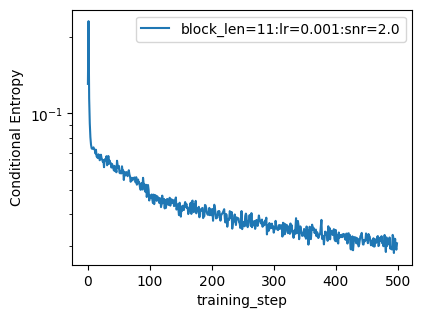

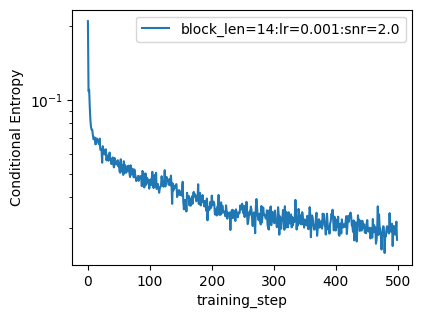

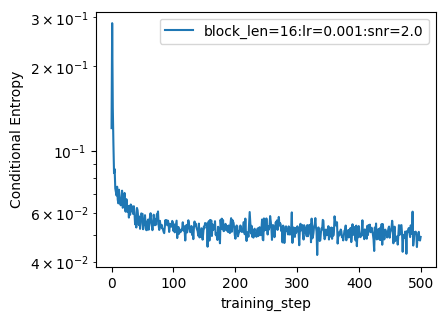

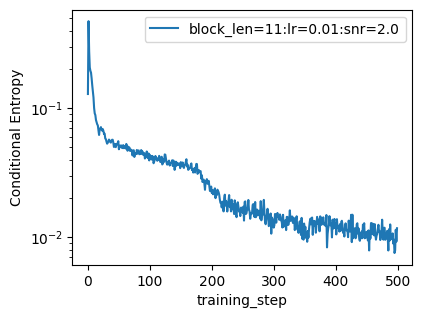

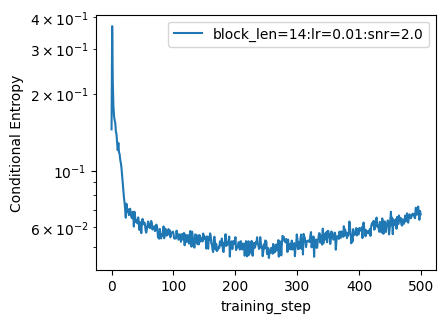

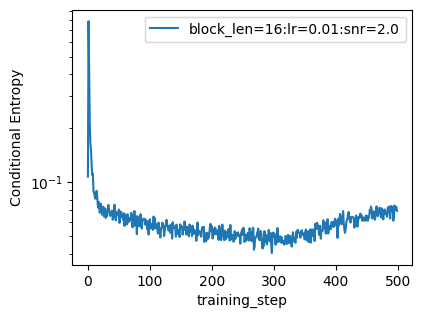

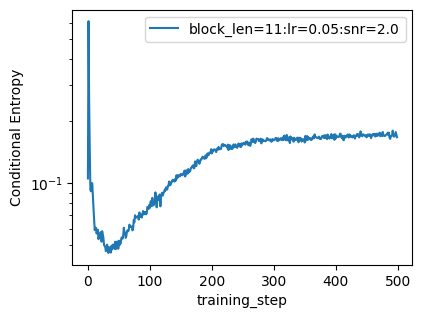

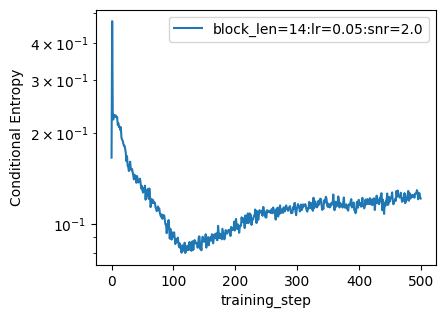

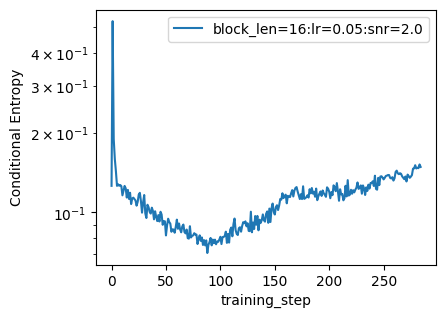

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# fig = plt.figure(figsize=(8, 6), dpi=100)
# ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
# capsize = 2

# for (snr, decoder_type, enc_name), exp_result in exp_results.groupby(["snr", "decoder_type", "encoder_name"]):
#     ax.errorbar(
#         exp_result["block_len"][:10], 
#         exp_result["xe__mean"][:10], 
#         yerr=exp_result["xe__err"][:10], 
#         linestyle='-',
#         capsize=capsize,
#         label=f"{enc_name}:{decoder_type}:snr={snr}"
#     )

for (lr, block_len, snr, argument_hash), training_result in training.groupby(["adam_lr", "block_len", "snr", "argument_hash"]):
    if len(training_result) < 100:
        continue
    
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        training_result["step"], 
        training_result["ce"], 
        # yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:lr={lr}:snr={snr}"
    )
    ax.legend()
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('Conditional Entropy')

    fig.show()

/tmp/ipykernel_5634/3049327522.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


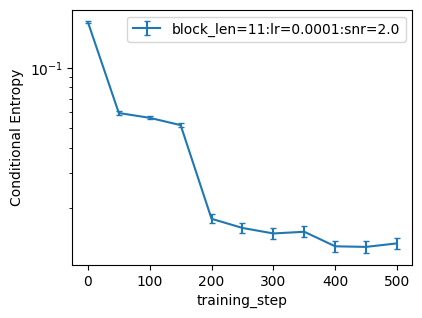

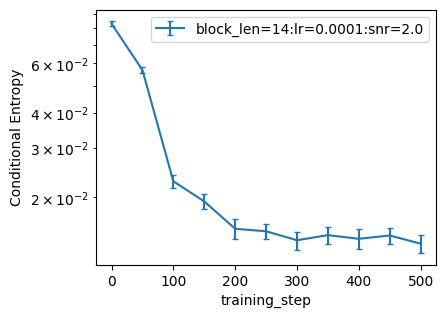

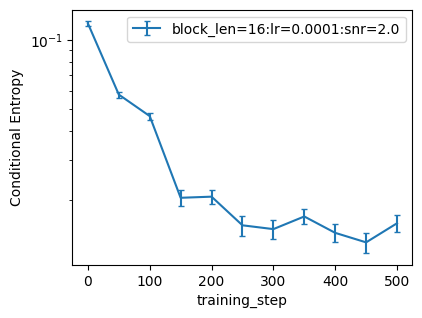

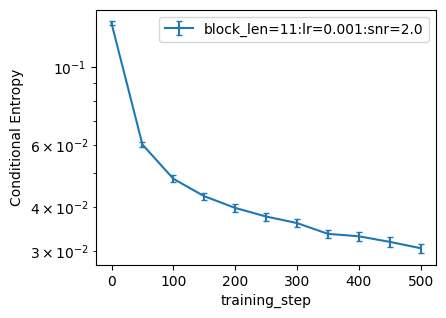

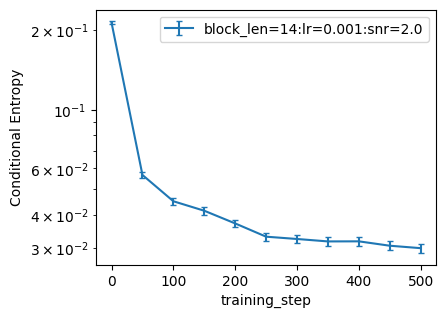

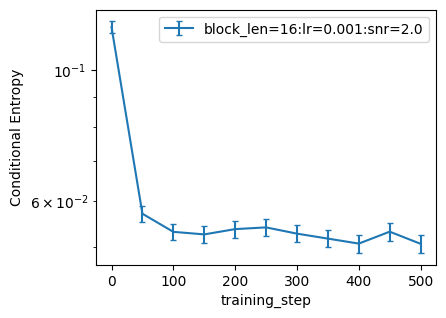

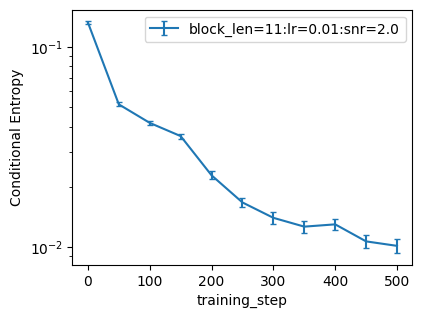

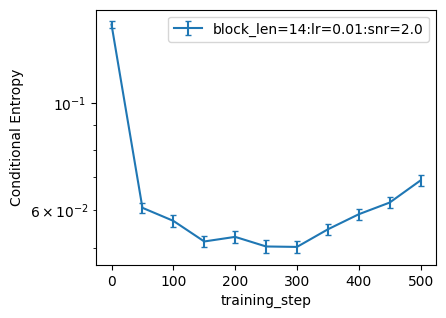

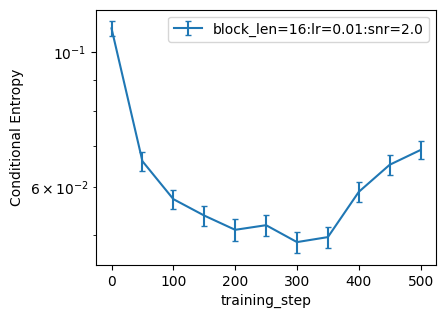

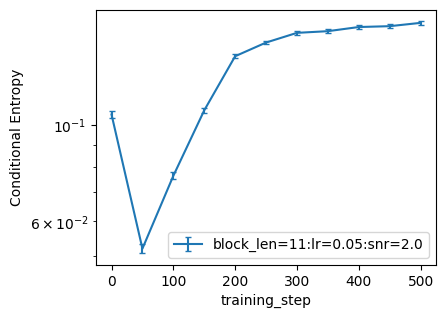

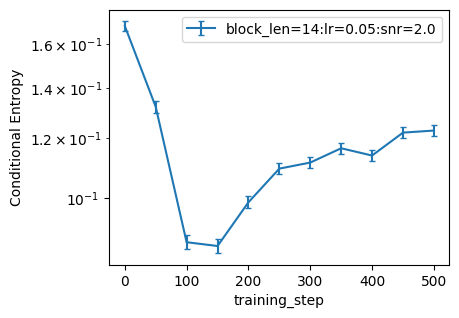

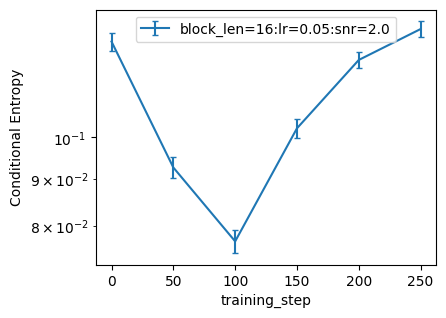

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# fig = plt.figure(figsize=(8, 6), dpi=100)
# ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
# capsize = 2

# for (snr, decoder_type, enc_name), exp_result in exp_results.groupby(["snr", "decoder_type", "encoder_name"]):
#     ax.errorbar(
#         exp_result["block_len"][:10], 
#         exp_result["xe__mean"][:10], 
#         yerr=exp_result["xe__err"][:10], 
#         linestyle='-',
#         capsize=capsize,
#         label=f"{enc_name}:{decoder_type}:snr={snr}"
#     )

for (lr, block_len, snr, argument_hash), validation_result in validation.groupby(["adam_lr", "block_len", "snr", "argument_hash"]):
    if len(validation_result) < 3:
        continue
    
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        validation_result["step"], 
        validation_result["ce__mean"], 
        yerr=validation_result["ce__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:lr={lr}:snr={snr}"
    )
    ax.legend()
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('Conditional Entropy')

    fig.show()